# App rating prediction model

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

## 1. Load the data

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for null values

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Dropping Null values

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum().any()

False

## 4. Incorrect type and inconsistent formatting (data cleaning)

In [8]:
df['Mb_exists'] = df.Size.str.find('M')
df['Size_new'] = df.Size.str.replace('k','')
df['Size_new'] = df.Size.str.replace('k','').str.replace('+','')
df['Size_new'] = df.Size.str.replace('k','').str.replace('+','').str.replace('M','')

In [9]:
#Seprating 'Varies with device' data to get the mean value from other entries
df_varies_with_device = df[df['Size_new']== 'Varies with device']
df = df[~(df['Size_new']== 'Varies with device')]

In [10]:
df.shape,df_varies_with_device.shape

((7723, 15), (1637, 15))

In [11]:
#Mean of Size 
df['Size_new'] =df.Size_new.astype(float)
df.Size_new.mean()

37.3070697915317

In [12]:
df_varies_with_device['Size_new'] = df_varies_with_device.Size_new.replace('Varies with device','37.31')
df_varies_with_device['Size_new'] = df_varies_with_device.Size_new.astype(float)

In [13]:
df = df.append(df_varies_with_device)

In [14]:
df.drop(columns={'Size'},inplace = True)
df.rename(columns={'Size_new':'Size'}, inplace = True)

In [15]:
#Converting Mb to Kb
df['Size'] = np.where(df.Mb_exists == -1, df.Size, (df.Size*1024))
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Mb_exists,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2,19456.00
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2,14336.00
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3,8908.80
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2,25600.00
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3,2867.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,-1,37.31
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,-1,37.31
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,-1,37.31
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,-1,37.31


In [16]:
df['Reviews'] = df.Reviews.replace('M','00000')
df['Reviews'] = df.Reviews.astype(int)

In [17]:
df['Installs'] = df.Installs.str.replace('+','')
df['Installs'] = df.Installs.str.replace('+','').str.replace(',','')
df['Installs'] = df.Installs.astype(int)

In [18]:
df["Price"] = df.Price.str.replace('$','')
df["Price"] = df.Price.str.replace('$','').str.replace('Everyone','0')
df['Price'] = df.Price.astype(float)

## 5. Sanity Check

In [19]:
#Average rating should be between 1 and 5 as only
df[df.Rating<1].sum().any()

False

In [20]:
df[df.Rating>5].sum().any()

False

In [21]:
#Reviews should not be more than installs
df = df[~(df.Reviews> df.Installs)]

In [22]:
df[(df['Type'] == 'Free') & (df['Price'] != 0)].sum().any()

False

## 6. Univariate analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

{'whiskers': [<matplotlib.lines.Line2D at 0x19334dedd00>,
 'caps': [<matplotlib.lines.Line2D at 0x19334e05400>,
 'boxes': [<matplotlib.lines.Line2D at 0x19334ded970>],
 'medians': [<matplotlib.lines.Line2D at 0x19334e05ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19334e05e20>],
 'means': []}

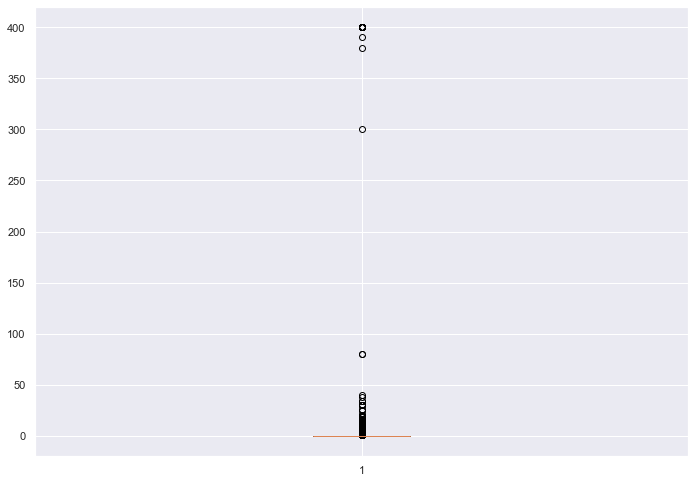

In [24]:
plt.boxplot(df.Price)

There are few apps with price of $200 or more. This seems very odd and very out side the range of avg price. Lets see how many records are there.

In [25]:
df[df['Price'] >200].Type.count()

15

In [26]:
#Let's drop this records
df = df[~(df['Price'] >200)]

{'whiskers': [<matplotlib.lines.Line2D at 0x19334e5a490>,
 'caps': [<matplotlib.lines.Line2D at 0x19334e5ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19334e5a130>],
 'medians': [<matplotlib.lines.Line2D at 0x19334e66280>],
 'fliers': [<matplotlib.lines.Line2D at 0x19334e665e0>],
 'means': []}

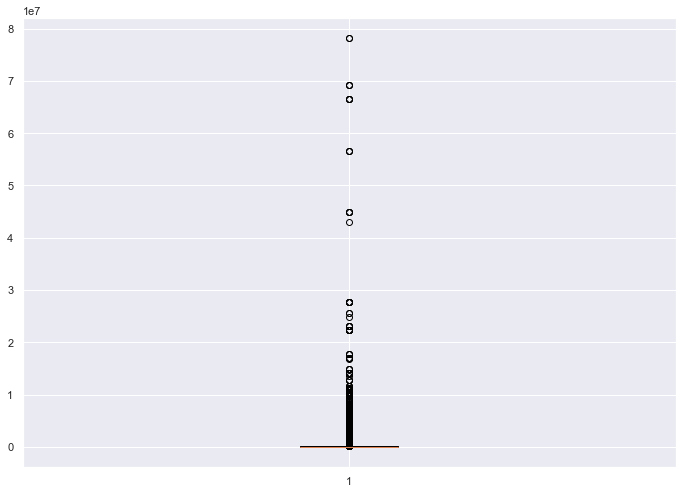

In [27]:
plt.boxplot(df.Reviews)

## 7. Outlier treatment

In [28]:
df[df['Reviews']>2000000].Type.count()

453

In [29]:
df = df[~(df['Reviews']>2000000)]

In [30]:
np.percentile( df.Installs,[1, 25, 50, 75, 99])

array([5.e+01, 1.e+04, 5.e+05, 5.e+06, 1.e+08])

In [31]:
df[df.Installs<50].Type.count()

75

In [32]:
df[df.Installs>100000000].Type.count()

20

In [33]:
#Considering 1 & 99 percentile as limit and removing those records. There are 95 such instances

In [34]:
df.drop(df[(df.Installs<50) | (df.Installs >100000000)].index, inplace = True)

## 8. Bivariate Analysis

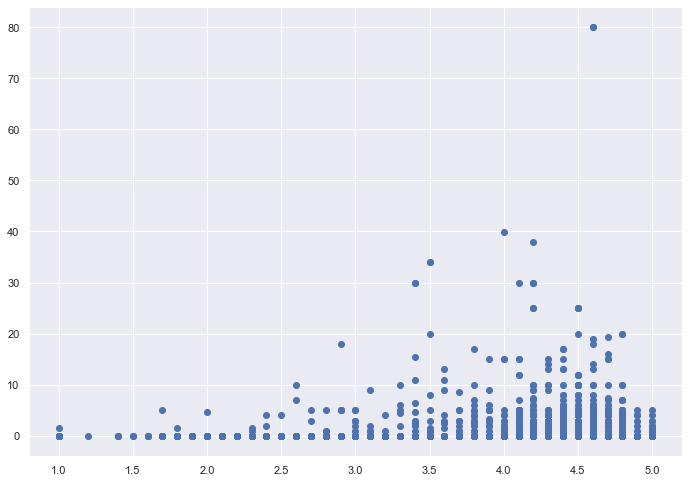

In [35]:
# Rating vs. Price
plt.scatter(df.Rating,df.Price)

There are few apps that are in the price range of $10 to $40 with are rated good. But most apps are free and they are also highly rated, so Price has little to do with rating here.

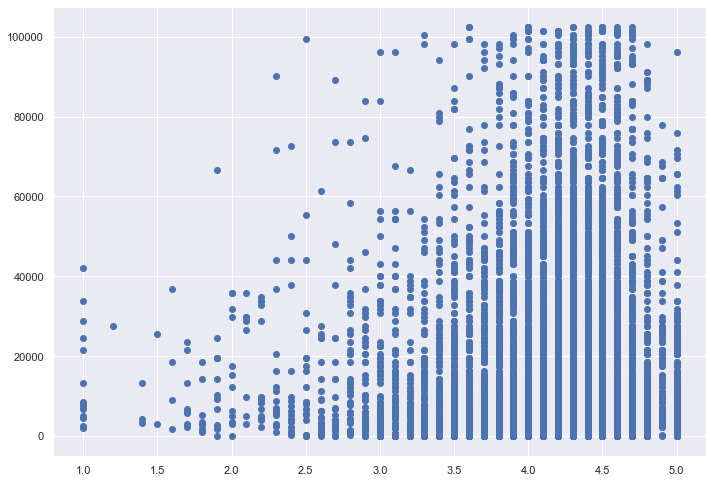

In [36]:
# Rating vs. Size
plt.scatter(df.Rating, df.Size)

More app are concentrated in the region of 20MB to 80Mb size region. And they are also good rated. 

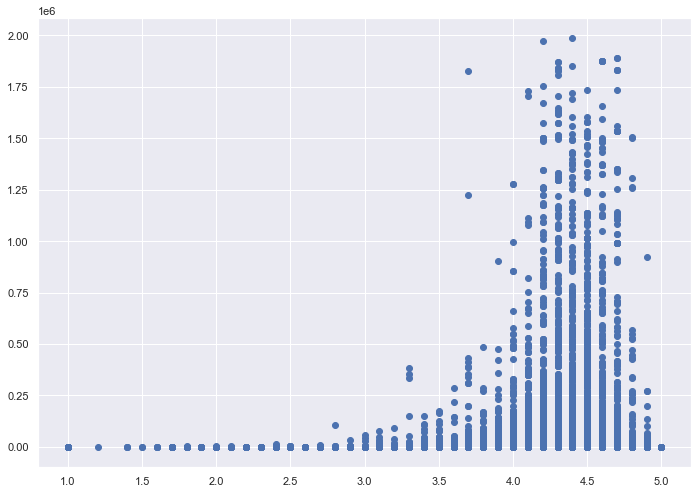

In [37]:
# Rating vs. Reviews
plt.scatter(df.Rating,df.Reviews)

Rating and Reviews seems to be very highly correlated. Highly rated apps have higher reviews.

In [38]:
df.rename(columns={'Content Rating':'Content_Rating'}, inplace= True)

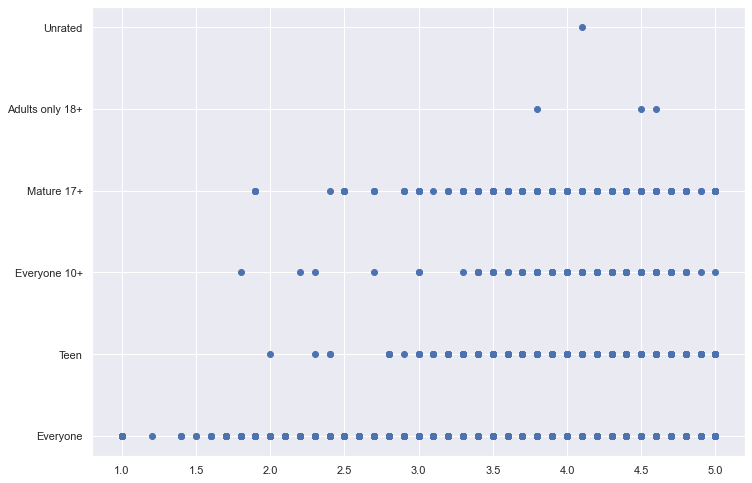

In [39]:
plt.scatter(df.Rating,df.Content_Rating)

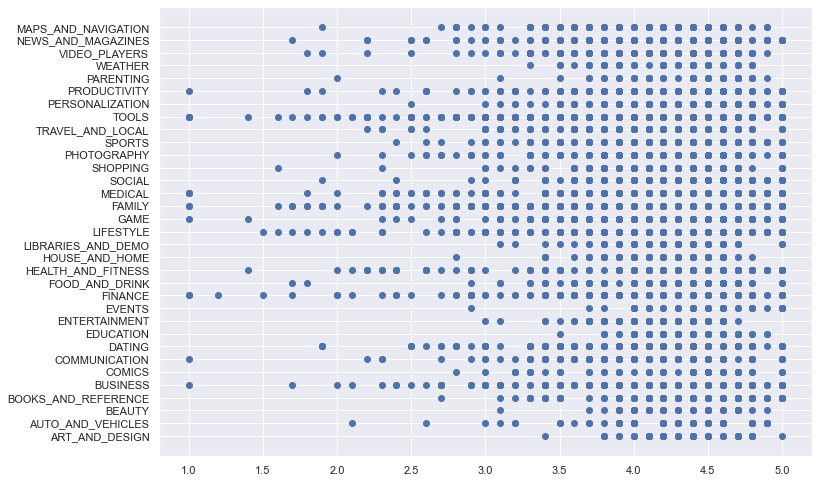

In [40]:
plt.scatter(df.Rating,df.Category)

{'whiskers': [<matplotlib.lines.Line2D at 0x193356d0580>,
 'caps': [<matplotlib.lines.Line2D at 0x193356d0c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x193356d0220>],
 'medians': [<matplotlib.lines.Line2D at 0x193356db340>],
 'fliers': [<matplotlib.lines.Line2D at 0x193356db6a0>],
 'means': []}

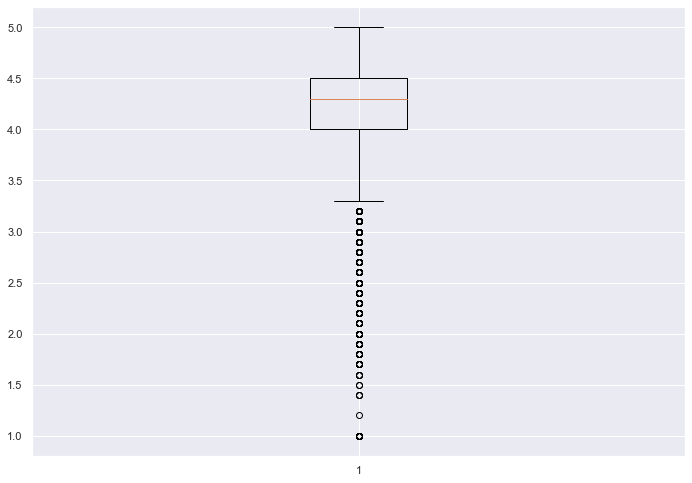

In [41]:
plt.boxplot(df.Rating)

## 9. Data Processing

In [42]:
# making copy of the dataset
inp1 = df

In [43]:
inp1.reset_index()

,index,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver,Mb_exists,Size
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2,19456.00
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2,14336.00
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3,8908.80
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2,25600.00
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3,2867.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,100000,Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,-1,37.31
8786,10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,1000,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,-1,37.31
8787,10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,-1,37.31
8788,10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,-1,37.31


Reviews and Install have some values that are still relatively very high. Before building a linear regression model, we need to reduce the skew. Applying the log transformation to Reviews and Installs.

In [44]:
inp1['Installs']=np.log1p(inp1.Installs)

In [45]:
inp1['Reviews'] = np.log1p(inp1.Reviews)

In [46]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Mb_exists', 'Size'],
      dtype='object')

In [47]:
inp1.drop(columns={'App','Last Updated', 'Current Ver',
       'Android Ver','Mb_exists','Type'} , inplace= True)

In [48]:
inp1 = pd.get_dummies(data = inp1,prefix_sep='_',columns=['Category','Genres','Content_Rating'])

## 10. Model building

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = inp1.drop(columns={'Rating'})
y = inp1['Rating']

In [51]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.30)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
rating_ln = LinearRegression().fit(x_train,y_train)

In [54]:
y_train_predicted_rating = pd.DataFrame(rating_ln.predict(x_train),columns=['Pred_rating'])
y_test_predicted_rating = pd.DataFrame(rating_ln.predict(x_test),columns=['Pred_rating'])

In [55]:
app_rating_test = pd.concat([x_test.reset_index(),y_test.reset_index(),y_test_predicted_rating],axis = 1)


In [56]:
app_rating_train = pd.concat([x_train.reset_index(),y_train.reset_index(),y_train_predicted_rating],axis = 1)

In [57]:
x_test.shape, y_test_predicted_rating.shape

((2637, 158), (2637, 1))

In [58]:
app_rating_test['err_pct'] = abs(app_rating_test.Rating-app_rating_test.Pred_rating)/app_rating_test.Rating

In [59]:
app_rating_train['err_pct'] = abs(app_rating_train.Rating-app_rating_train.Pred_rating)/app_rating_train.Rating

## 11. Results

In [60]:
from sklearn.metrics import r2_score

In [61]:
#train
print("Error is: ",np.mean(app_rating_train.err_pct))
print("Accuracy is: ",1-np.mean(app_rating_train.err_pct))
print("R Square is: ",r2_score(app_rating_train.Rating,app_rating_train.Pred_rating))

Error is:  0.09304079269807139
Accuracy is:  0.9069592073019286
R Square is:  0.15478474200927117


In [62]:
#test
print("Error is: ",np.mean(app_rating_test.err_pct))
print("Accuracy is: ",1-np.mean(app_rating_test.err_pct))
print("R Square is: ",r2_score(app_rating_test.Rating,app_rating_test.Pred_rating))

Error is:  0.09225407116259407
Accuracy is:  0.9077459288374059
R Square is:  0.15865647036652775
